# **Practical-05** : Decision Tree Learning

### **Objective** : To implement Decision Tree Algorithm using Scikit Learn Library and understand its working.

In [2]:
# import libraries

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import datasets #various toy datasets
from sklearn import metrics #Check accuracy of model

In [3]:
# Load dataset
iris = datasets.load_iris()

In [4]:
# separate features and class label

X = iris.data
y= iris.target
feature_names = iris.feature_names
target_names = iris.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


In [5]:
# Split data into test data and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5 , random_state = 148)

In [6]:
clf = DecisionTreeClassifier(random_state=110)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [7]:
ccp_alphas

array([0.        , 0.02583333, 0.2883    , 0.33973333])

In [8]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=148, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3397333333333333


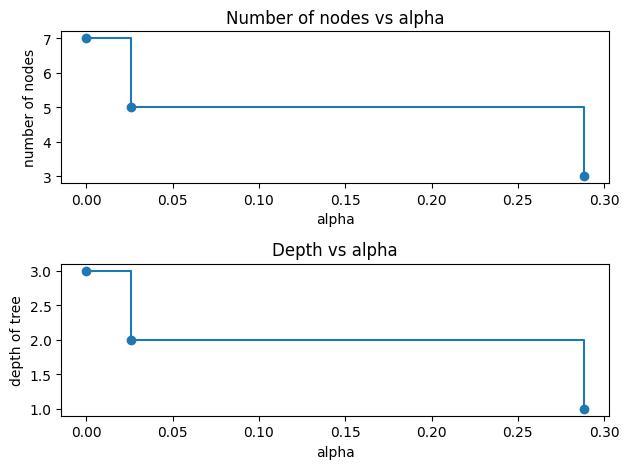

In [9]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

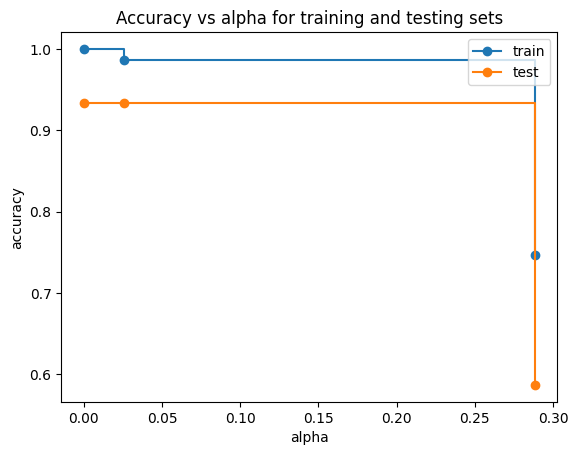

In [10]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [11]:
clf = DecisionTreeClassifier(ccp_alpha=0.015, criterion='gini')
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.015)

In [12]:
# Predict Output
y_train_pred = clf.predict(X_train)
print("y_train_pred: ",y_train_pred)
y_test_pred = clf.predict(X_test)
print("y_test_pred : ",y_test_pred)

y_train_pred:  [1 1 1 1 0 1 0 0 2 1 2 1 1 2 0 2 1 1 1 2 1 0 1 0 2 1 2 2 2 0 0 0 1 1 2 0 2
 2 2 1 1 1 0 1 0 2 1 2 1 2 0 1 1 0 1 0 2 0 2 0 0 0 1 0 0 0 1 0 1 0 1 1 2 0
 1]
y_test_pred :  [2 1 0 2 0 0 2 0 2 0 2 1 2 2 1 2 1 0 2 2 0 2 0 0 2 1 1 1 0 0 2 0 1 0 1 2 1
 2 1 2 2 1 1 0 1 2 0 0 1 2 0 2 0 2 2 0 1 2 0 2 0 2 0 0 1 1 2 1 1 0 2 2 1 0
 2]


In [13]:
# Calculate Accuracy and Confusion Matrix

print ("Training Accuracy : \n",accuracy_score(y_train,y_train_pred)*100)
print ("Testing Accuracy : \n",accuracy_score(y_test,y_test_pred)*100)

Training Accuracy : 
 100.0
Testing Accuracy : 
 94.66666666666667


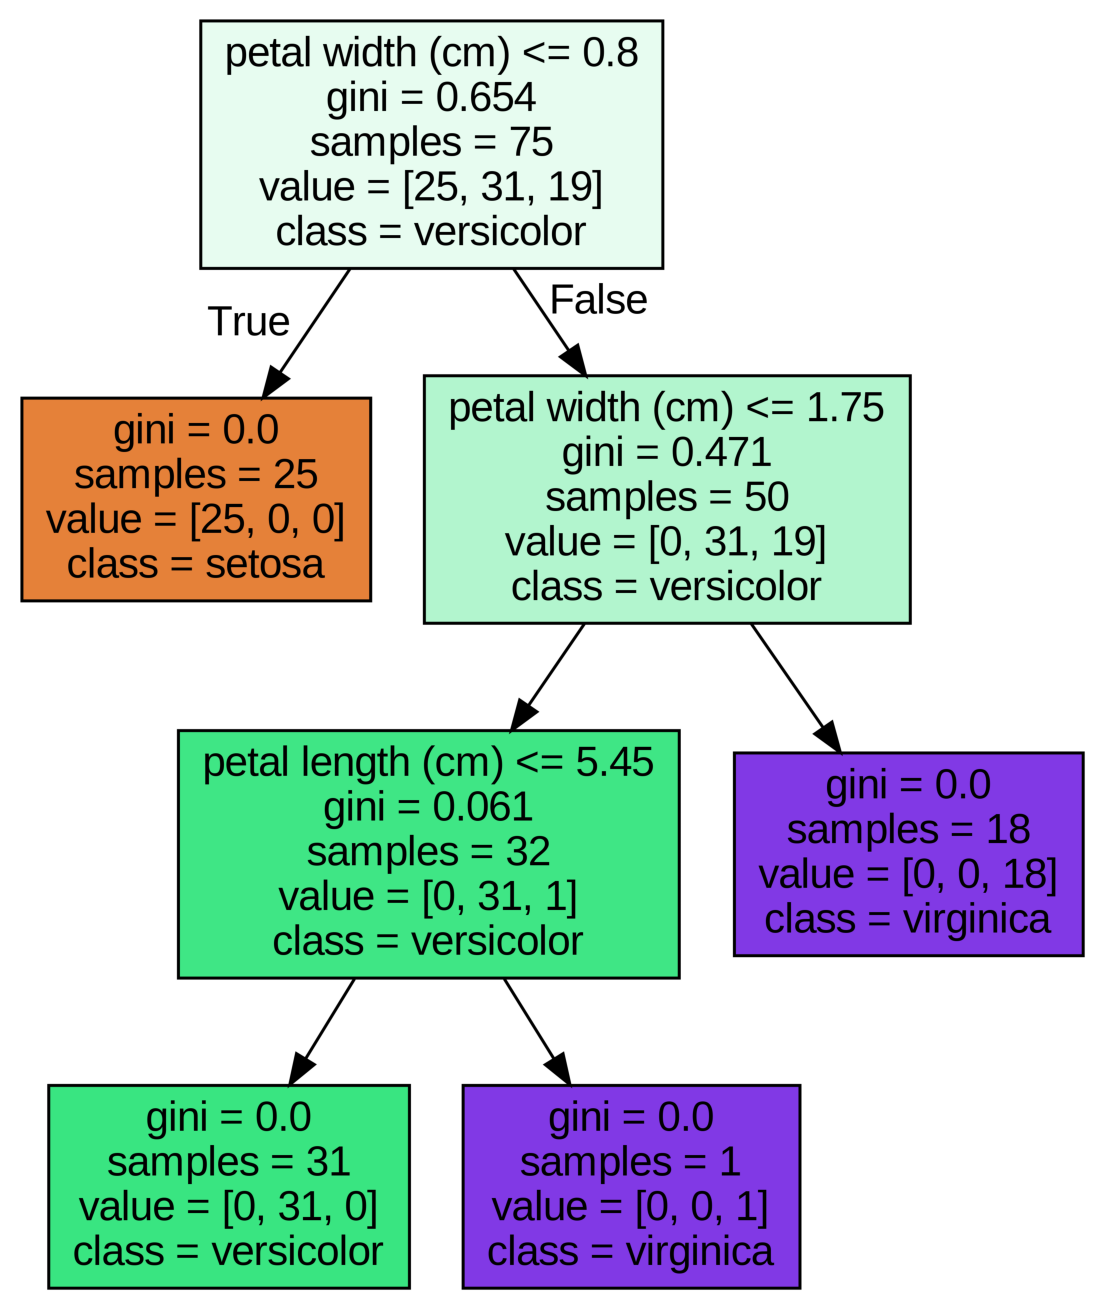

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],class_names=['setosa','versicolor','virginica'],filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

> ## Task 1: Try the algo on Same Weather dataset - LabelEncoding of features:and Train test Division 85%-15%

In [15]:
#Predictor variables
Outlook = ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny','Overcast','Rainy', 'Rainy', 'Sunny', 'Rainy','Overcast', 'Overcast','Sunny']
Temperature = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool','Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']
Humidity = ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal','High', 'Normal', 'Normal', 'Normal', 'High', 'Normal','High']
Wind = ['False', 'True', 'False', 'False', 'False', 'True', 'True','False', 'False', 'False', 'True', 'True', 'False', 'True']

#Class Label:
Play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No','Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [16]:
# Step 3: Digitize the data set using encoding

le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
Outlook_encoded = le.fit_transform(Outlook)
Outlook_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Outllok mapping:",Outlook_name_mapping)

Temperature_encoded = le.fit_transform(Temperature)
Temperature_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Temperature mapping:",Temperature_name_mapping)

Humidity_encoded = le.fit_transform(Humidity)
Humidity_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Humidity mapping:",Humidity_name_mapping)

Wind_encoded = le.fit_transform(Wind)
Wind_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Wind mapping:",Wind_name_mapping)

Play_encoded = le.fit_transform(Play)
Play_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Play mapping:",Play_name_mapping)

print("\n\n")

print("Weather:" ,Outlook_encoded)
print("Temerature:" ,Temperature_encoded)
print("Humidity:" ,Humidity_encoded)
print("Wind:" ,Wind_encoded)
print("Play:" ,Play_encoded)

Outllok mapping: {'Overcast': 0, 'Rainy': 1, 'Sunny': 2}
Temperature mapping: {'Cool': 0, 'Hot': 1, 'Mild': 2}
Humidity mapping: {'High': 0, 'Normal': 1}
Wind mapping: {'False': 0, 'True': 1}
Play mapping: {'No': 0, 'Yes': 1}



Weather: [1 1 0 2 2 2 0 1 1 2 1 0 0 2]
Temerature: [1 1 1 2 0 0 0 2 0 2 2 2 1 2]
Humidity: [0 0 0 0 1 1 1 0 1 1 1 0 1 0]
Wind: [0 1 0 0 0 1 1 0 0 0 1 1 0 1]
Play: [0 0 1 1 1 0 1 0 1 1 1 1 1 0]


In [17]:
# Step 4: Merge different features to prepare dataset and split dataset into train-test

# Merge different features

features=tuple(zip(Outlook_encoded,Temperature_encoded,Humidity_encoded,Wind_encoded))
print("Features:",features)

# Split dataset into train-test
X = features
Y = Play
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.5 , random_state = 110)

Features: ((1, 1, 0, 0), (1, 1, 0, 1), (0, 1, 0, 0), (2, 2, 0, 0), (2, 0, 1, 0), (2, 0, 1, 1), (0, 0, 1, 1), (1, 2, 0, 0), (1, 0, 1, 0), (2, 2, 1, 0), (1, 2, 1, 1), (0, 2, 0, 1), (0, 1, 1, 0), (2, 2, 0, 1))


In [18]:
clf = DecisionTreeClassifier(random_state=110)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [19]:
ccp_alphas

array([0.        , 0.0952381 , 0.12244898])

In [20]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=148, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.12244897959183676


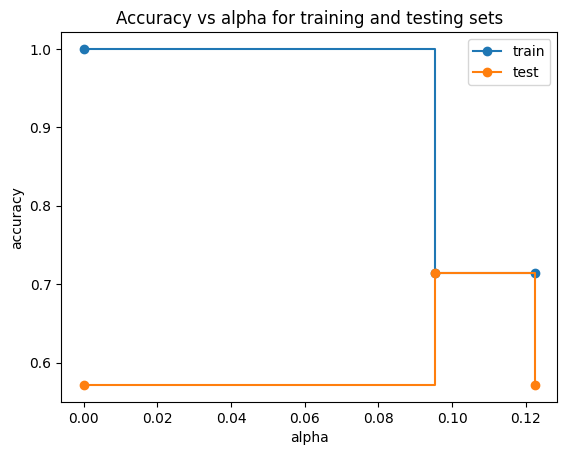

In [21]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [22]:
clf = DecisionTreeClassifier(ccp_alpha=0.03, criterion='gini')
clf.fit(X_train, y_train)

# Predict Output
y_train_pred = clf.predict(X_train)
print("y_train_pred: ",y_train_pred)
y_test_pred = clf.predict(X_test)
print("y_test_pred : ",y_test_pred)

y_train_pred:  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No']
y_test_pred :  ['Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'No']


In [23]:
# Calculate Accuracy and Confusion Matrix

print ("Training Accuracy : \n",accuracy_score(y_train,y_train_pred)*100)
print ("Testing Accuracy : \n",accuracy_score(y_test,y_test_pred)*100)

Training Accuracy : 
 100.0
Testing Accuracy : 
 57.14285714285714


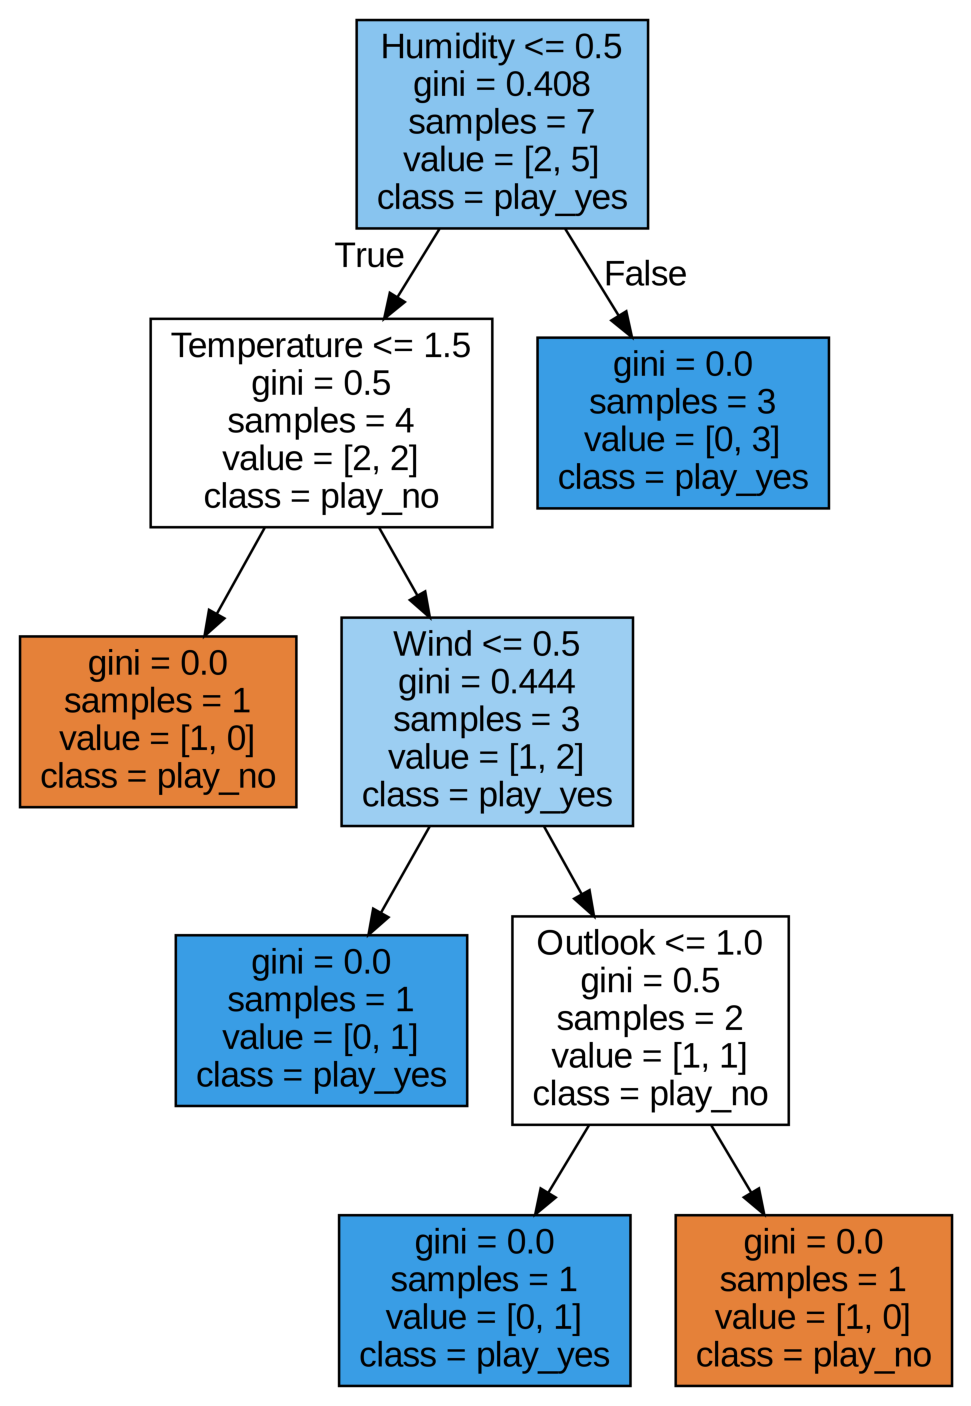

In [24]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',feature_names=['Outlook','Temperature','Humidity','Wind'],class_names=['play_no','play_yes'],filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

> ## **Task 2: Apply algorithm on wine dataset - LabelEncoding of features: and Train test Division 50%-50%**

In [25]:
# Load dataset
wine_dataset = datasets.load_wine()

In [26]:
# separate features and class label

X = wine_dataset.data
y= wine_dataset.target
feature_names = wine_dataset.feature_names
target_names = wine_dataset.target_names
print("Feature names:", feature_names)
print("Target names:", target_names)

Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target names: ['class_0' 'class_1' 'class_2']


In [27]:
# Split data into test data and train data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34 , random_state = 110)

In [28]:
clf = DecisionTreeClassifier(random_state=148)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

In [29]:
ccp_alphas

array([0.        , 0.01665571, 0.08755472, 0.27984014])

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
  clf = DecisionTreeClassifier(random_state=110, ccp_alpha=ccp_alpha)
  clf.fit(X_train, y_train)
  clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.279840142254151


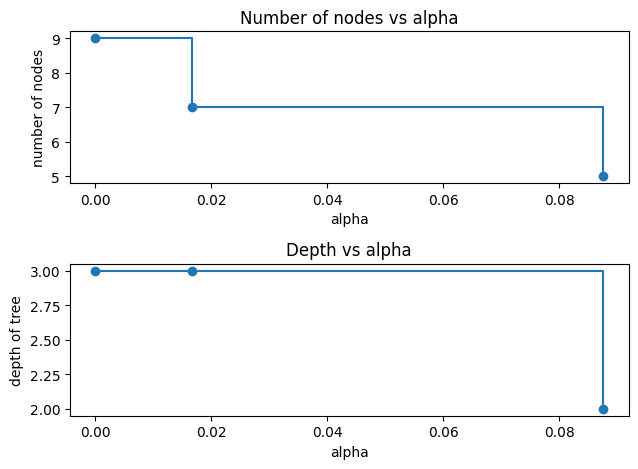

In [31]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

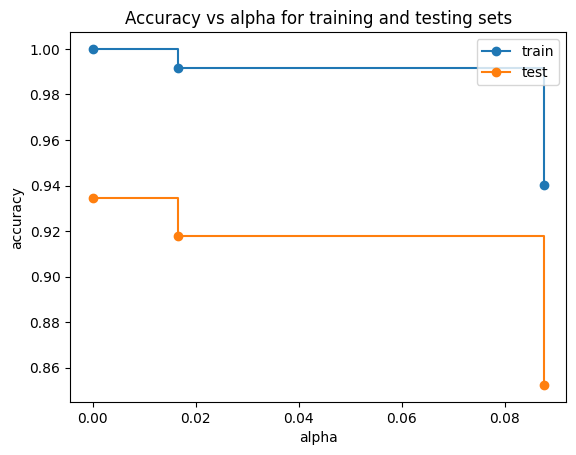

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
clf = DecisionTreeClassifier(ccp_alpha=0.01, criterion='gini')
clf.fit(X_train, y_train)

# Predict Output
y_train_pred = clf.predict(X_train)
print("y_train_pred: ",y_train_pred)
y_test_pred = clf.predict(X_test)
print("y_test_pred : ",y_test_pred)

y_train_pred:  [1 2 0 0 0 0 2 1 0 0 2 1 1 1 2 0 0 1 0 2 2 0 1 1 2 0 1 0 1 2 2 1 1 1 2 1 0
 2 1 0 0 2 0 0 1 2 2 1 1 2 1 0 0 1 2 0 1 1 2 2 1 0 1 2 1 1 2 0 1 2 2 2 2 0
 1 2 0 1 2 2 1 2 0 0 0 0 0 1 0 1 1 1 0 2 2 0 2 2 0 2 1 1 1 0 2 1 2 2 0 1 1
 2 1 1 0 1 1]
y_test_pred :  [0 2 1 0 1 1 1 1 2 1 1 1 0 1 0 1 1 2 0 1 0 2 1 1 0 1 2 2 1 1 1 1 1 1 0 1 0
 0 0 1 1 0 0 0 0 2 2 0 1 1 1 0 1 2 0 0 1 0 0 0 2]


In [34]:
# Calculate Accuracy and Confusion Matrix

print ("Training Accuracy : \n",accuracy_score(y_train,y_train_pred)*100)
print ("Testing Accuracy : \n",accuracy_score(y_test,y_test_pred)*100)

Training Accuracy : 
 100.0
Testing Accuracy : 
 90.1639344262295


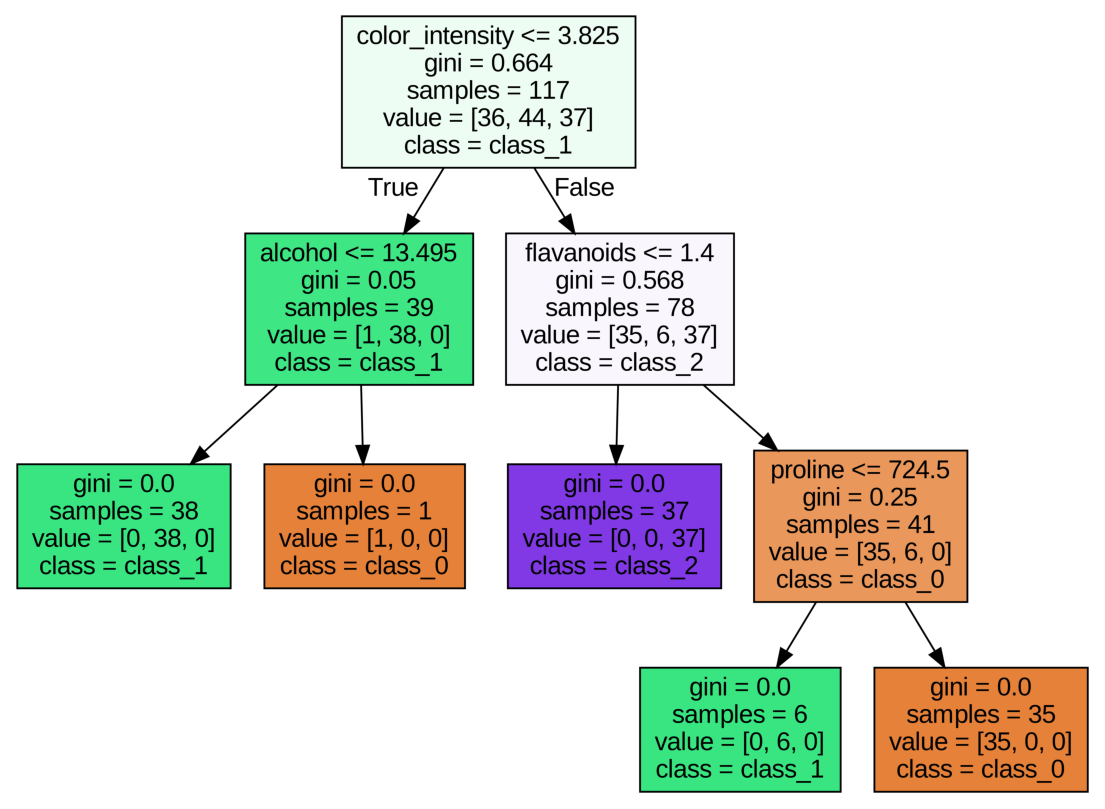

In [35]:
from sklearn.tree import export_graphviz
export_graphviz(clf,out_file='tree.dot',feature_names=feature_names,class_names=target_names,filled=True)

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png','-Gdpi=600'])

# Display in python
import matplotlib.pyplot as plt
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();